In [ ]:
import yfinance as yf

In [ ]:
df = yf.download('^NSEI', '2014-04-01' , '2024-05-13')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.shape

(2480, 6)

In [ ]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-06,22561.599609,22588.800781,22409.449219,22442.699219,22442.699219,320300
2024-05-07,22489.750000,22499.050781,22232.050781,22302.500000,22302.500000,297800
2024-05-08,22231.199219,22368.650391,22185.199219,22302.500000,22302.500000,277400
2024-05-09,22224.800781,22307.750000,21932.400391,21957.500000,21957.500000,331300
2024-05-10,21990.949219,22131.300781,21950.300781,22055.199219,22055.199219,265800


**ARIMA WITHOUT SENTIMENT ANALYSIS (2014-2017)**

In [ ]:
def ARIMA_ALGO(df):
    # Import necessary libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    import math
    from statsmodels.tsa.arima.model import ARIMA
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import numpy as np

    # Set the index to the DataFrame index
    df.index = pd.to_datetime(df.index)  # Ensure index is datetime
    Quantity_date = df[['Close', 'High', 'Low']]  # Assuming 'Close', 'High', and 'Low' are the columns of interest

    # Define ARIMA model function
    def arima_model(train, test, order):
        history = [x for x in train]
        predictions = list()
        for t in range(len(test)):
            model = ARIMA(history, order=order)
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
        return predictions

    # Plot original data
    fig = plt.figure(figsize=(7.2, 4.8), dpi=65)
    plt.plot(Quantity_date)
    plt.legend(['Close', 'High', 'Low'])
    plt.savefig(r'C:\Users\MANISH\Desktop\MiniProject_MTech\Trends.png')
    plt.close(fig)

    # Split data into train and test sets
    quantity = Quantity_date.values
    size = int(len(quantity) * 0.80)
    train, test = quantity[0:size], quantity[size:len(quantity)]

    # Fit ARIMA model for Close Price
    close_order = (6, 1, 0)  # ARIMA order for Close Price
    close_predictions = arima_model(train[:, 0], test[:, 0], close_order)

    # Fit ARIMA model for High Price
    high_order = (6, 1, 0)  # ARIMA order for High Price
    high_predictions = arima_model(train[:, 1], test[:, 1], high_order)

    # Fit ARIMA model for Low Price
    low_order = (6, 1, 0)  # ARIMA order for Low Price
    low_predictions = arima_model(train[:, 2], test[:, 2], low_order)

    # Plot predictions
    fig = plt.figure(figsize=(7.2, 4.8), dpi=65)
    plt.plot(test[:, 0], label='Actual Close Price')
    plt.plot(close_predictions, label='Predicted Close Price')
    plt.plot(test[:, 1], label='Actual High Price')
    plt.plot(high_predictions, label='Predicted High Price')
    plt.plot(test[:, 2], label='Actual Low Price')
    plt.plot(low_predictions, label='Predicted Low Price')
    plt.legend(loc=4)
    plt.savefig(r'C:\Users\MANISH\Desktop\MiniProject_MTech\ARIMA.png')
    plt.close(fig)

    # Print prediction and RMSE
    print()
    print("##############################################################################")
    close_pred = close_predictions[-1]
    high_pred = high_predictions[-1]
    low_pred = low_predictions[-1]
    print("Tomorrow's Predictions:")
    print("Close Price Prediction by ARIMA:", close_pred)
    print("High Price Prediction by ARIMA:", high_pred)
    print("Low Price Prediction by ARIMA:", low_pred)
    error_close = math.sqrt(mean_squared_error(test[:, 0], close_predictions))
    error_high = math.sqrt(mean_squared_error(test[:, 1], high_predictions))
    error_low = math.sqrt(mean_squared_error(test[:, 2], low_predictions))
    print("Close Price RMSE:", error_close)
    print("High Price RMSE:", error_high)
    print("Low Price RMSE:", error_low)
    print("##############################################################################")

    # Calculate overall MSE, MAE, RMSE,
    overall_mse = mean_squared_error(test.flatten(), np.array(close_predictions + high_predictions + low_predictions).flatten())
    overall_mae = mean_absolute_error(test.flatten(), np.array(close_predictions + high_predictions + low_predictions).flatten())
    overall_rmse = math.sqrt(overall_mse)

    print("Overall MSE:", overall_mse)
    print("Overall MAE:", overall_mae)
    print("Overall RMSE:", overall_rmse)




    return close_pred, high_pred, low_pred, error_close, error_high, error_low, overall_mse, overall_mae, overall_rmse

# Example usage:
# Assuming 'df' is your DataFrame containing the stock data
close_pred, high_pred, low_pred, error_close, error_high, error_low, overall_mse, overall_mae, overall_rmse = ARIMA_ALGO(df)



##############################################################################
Tomorrow's Predictions:
Close Price Prediction by ARIMA: 21938.779784383823
High Price Prediction by ARIMA: 22306.89801161792
Low Price Prediction by ARIMA: 21908.069571304997
Close Price RMSE: 140.7086862814486
High Price RMSE: 124.34601044052808
Low Price RMSE: 134.527890971908
##############################################################################
Overall MSE: 4524134.472332212
Overall MAE: 1738.9401379075841
Overall RMSE: 2127.001286396464


In [ ]:
import pandas as pd
sentiment_df = pd.read_csv("/content/TotalsentimentFile.csv")

In [ ]:
sentiment_df.head(5)

,Date,Total Sentiment Score
0,01-04-2014,0.2023
1,02-04-2014,0.4939
2,03-04-2014,0.2732
3,04-04-2014,0.9176
4,06-04-2014,0.0000


In [ ]:
df.reset_index(inplace=True)  # To make format of both dataframes the same

In [ ]:
# Convert 'Date' columns to datetime objects
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'], format='%d-%m-%Y')
df['Date'] = pd.to_datetime(df['Date'])
df_merged = pd.merge(df, sentiment_df, how='inner', on='Date')

In [ ]:
df_merged.rename(columns={'Total Sentiment Score' : 'score'} , inplace=True)

In [ ]:
df_merged.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,score
0,2014-04-01,46.783333,47.316666,45.441666,45.658333,25.110214,2785116,0.2023
1,2014-04-02,45.716667,46.575001,45.608334,46.150002,25.380610,2759412,0.4939
2,2014-04-03,46.166664,46.458332,45.000000,45.575001,25.064381,4788780,0.2732
3,2014-04-04,44.683334,47.458332,44.049999,46.933334,25.811413,25210902,0.9176
4,2014-04-07,47.166664,47.666664,45.349998,45.708332,25.137709,5105760,0.4404


**ARIMA WITH SENTIMENT ANALYSIS (2014-2017)**

In [ ]:
def ARIMA_ALGO_s(df_merged):
    # Import necessary libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    import math
    from statsmodels.tsa.arima.model import ARIMA
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    # Set the index to the DataFrame index
    df_merged.index = pd.to_datetime(df.index)  # Ensure index is datetime
    Quantity_date = df_merged[['Close', 'High', 'Low', 'score']]  # Include 'Total Sentiment Score'

    # Define ARIMA model function
    def arima_model(train, test, sentiment_train, sentiment_test, order):
        history = [(train[i], sentiment_train[i]) for i in range(len(train))]
        predictions = list()
        for t in range(len(test)):
            model = ARIMA([x[0] for x in history], exog=[x[1] for x in history], order=order)
            model_fit = model.fit()
            output = model_fit.forecast(exog=[sentiment_test[t]])
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append((obs, sentiment_test[t]))
        return predictions

    # Plot original data
    fig = plt.figure(figsize=(7.2, 4.8), dpi=65)
    plt.plot(Quantity_date[['Close', 'High', 'Low']])
    plt.legend(['Close', 'High', 'Low'])
    plt.savefig(r'C:\Users\MANISH\Desktop\MiniProject_MTech\Trends.png')
    plt.close(fig)

    # Split data into train and test sets
    quantity = Quantity_date[['Close', 'High', 'Low']].values
    sentiment = Quantity_date['score'].values
    size = int(len(quantity) * 0.80)
    train, test = quantity[0:size], quantity[size:len(quantity)]
    sentiment_train, sentiment_test = sentiment[0:size], sentiment[size:len(quantity)]

    # Fit ARIMA model for Close Price
    close_order = (6, 1, 0)  # ARIMA order for Close Price
    close_predictions = arima_model(train[:, 0], test[:, 0], sentiment_train, sentiment_test, close_order)

    # Fit ARIMA model for High Price
    high_order = (6, 1, 0)  # ARIMA order for High Price
    high_predictions = arima_model(train[:, 1], test[:, 1], sentiment_train, sentiment_test, high_order)

    # Fit ARIMA model for Low Price
    low_order = (6, 1, 0)  # ARIMA order for Low Price
    low_predictions = arima_model(train[:, 2], test[:, 2], sentiment_train, sentiment_test, low_order)

    # Plot predictions
    fig = plt.figure(figsize=(7.2, 4.8), dpi=65)
    plt.plot(test[:, 0], label='Actual Close Price')
    plt.plot(close_predictions, label='Predicted Close Price')
    plt.plot(test[:, 1], label='Actual High Price')
    plt.plot(high_predictions, label='Predicted High Price')
    plt.plot(test[:, 2], label='Actual Low Price')
    plt.plot(low_predictions, label='Predicted Low Price')
    plt.legend(loc=4)
    plt.savefig(r'C:\Users\MANISH\Desktop\MiniProject_MTech\ARIMA_sentiment.png')
    plt.close(fig)

    # Print prediction and RMSE
    print()
    print("##############################################################################")
    close_pred = close_predictions[-1]
    high_pred = high_predictions[-1]
    low_pred = low_predictions[-1]
    print("Tomorrow's Predictions:")
    print("Close Price Prediction by ARIMA:", close_pred)
    print("High Price Prediction by ARIMA:", high_pred)
    print("Low Price Prediction by ARIMA:", low_pred)
    error_close = mean_squared_error(test[:, 0], close_predictions)
    error_high = mean_squared_error(test[:, 1], high_predictions)
    error_low = mean_squared_error(test[:, 2], low_predictions)
    mae_close = mean_absolute_error(test[:, 0], close_predictions)
    mae_high = mean_absolute_error(test[:, 1], high_predictions)
    mae_low = mean_absolute_error(test[:, 2], low_predictions)
    print("Close Price MSE:", error_close)
    print("High Price MSE:", error_high)
    print("Low Price MSE:", error_low)
    print("Overall MSE:", (error_close + error_high + error_low) / 3)
    print("Close Price MAE:", mae_close)
    print("High Price MAE:", mae_high)
    print("Low Price MAE:", mae_low)
    print("Overall MAE:", (mae_close + mae_high + mae_low) / 3)
    print("Close Price RMSE:", math.sqrt(error_close))
    print("High Price RMSE:", math.sqrt(error_high))
    print("Low Price RMSE:", math.sqrt(error_low))
    print("Overall RMSE:", math.sqrt((error_close + error_high + error_low) / 3))
    print("##############################################################################")

    return close_pred, high_pred, low_pred, error_close, error_high, error_low

# Example usage:
# Assuming df_merged is your DataFrame
#close_pred, high_pred, low_pred, error_close, error_high, error_low = ARIMA_ALGO(df_merged)


In [ ]:
ARIMA_ALGO(df_merged)


##############################################################################
Tomorrow's Predictions:
Close Price Prediction by ARIMA: 130.7505942996901
High Price Prediction by ARIMA: 130.6856240079534
Low Price Prediction by ARIMA: 125.95106004082959
Close Price RMSE: 2.185020210089765
High Price RMSE: 1.8964945153178294
Low Price RMSE: 2.294211426494693
##############################################################################
Overall MSE: 494.5011691743773
Overall MAE: 18.08950522283482
Overall RMSE: 22.237382246442078


(130.7505942996901,
 130.6856240079534,
 125.95106004082959,
 2.185020210089765,
 1.8964945153178294,
 2.294211426494693,
 494.5011691743773,
 18.08950522283482,
 22.237382246442078,
 -0.9401062243278238)

**LSTM WITHOUT SENTIMENT - DEPENDS TOTALLY ON PRICE  2014-2017**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Selecting features
data = df_merged[['Close', 'High', 'Low']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create dataset
def create_dataset(data, timestep):
    X, y = [], []
    for i in range(len(data) - timestep):
        X.append(data[i:(i + timestep)])
        y.append(data[i + timestep])
    return np.array(X), np.array(y)

# Define the timestep
timestep = 60

# Create the dataset
X, y = create_dataset(scaled_data, timestep)

# Splitting the data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for LSTM model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 3))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 3))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 3)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=3))  # 3 output nodes for Close, High, Low
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Get predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate RMSE, MSE, and MAE
rmse = math.sqrt(mean_squared_error(y_test_inv, predictions))
mse = mean_squared_error(y_test_inv, predictions)
mae = mean_absolute_error(y_test_inv, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Print the predicted Close, High, and Low prices
print("Predicted Close Price:", predictions[-1][0])
print("Predicted High Price:", predictions[-1][1])
print("Predicted Low Price:", predictions[-1][2])

# Plot the results for Close, High, and Low prices
plt.figure(figsize=(14, 6))

for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(y_test_inv[:, i], color='blue', label='Actual ' + ['Close', 'High', 'Low'][i] + ' Price')
    plt.plot(predictions[:, i], color='red', label='Predicted ' + ['Close', 'High', 'Low'][i] + ' Price')
    plt.title('Stock ' + ['Close', 'High', 'Low'][i] + ' Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'df_merged' is not defined

**LSTM WITH SENTIMENT ANALYSIS FINANCE NEWS - 2014 - 2017**

Epoch 1/100
20/20 [==============================] - 14s 94ms/step - loss: 0.0529 - val_loss: 0.5165
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0262 - val_loss: 0.2663
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0136 - val_loss: 0.2324
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0105 - val_loss: 0.1281
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0069 - val_loss: 0.0266
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0031 - val_loss: 0.0140
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0170
Epoch 8/100
20/20 [==============================] - 0s 13ms/step - loss: 0.0025 - val_loss: 0.0055
Epoch 9/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0022 - val_loss: 0.0151
Epoch 10/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0023 - val_loss: 0.005

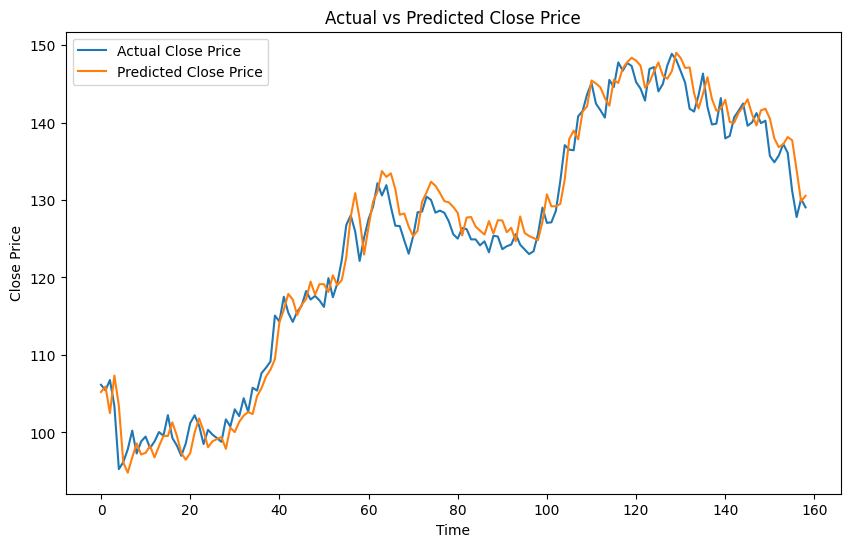

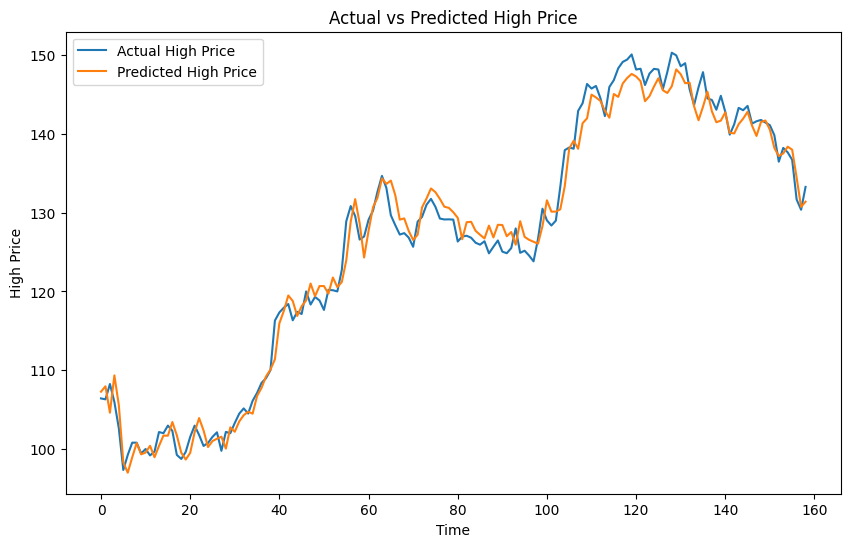

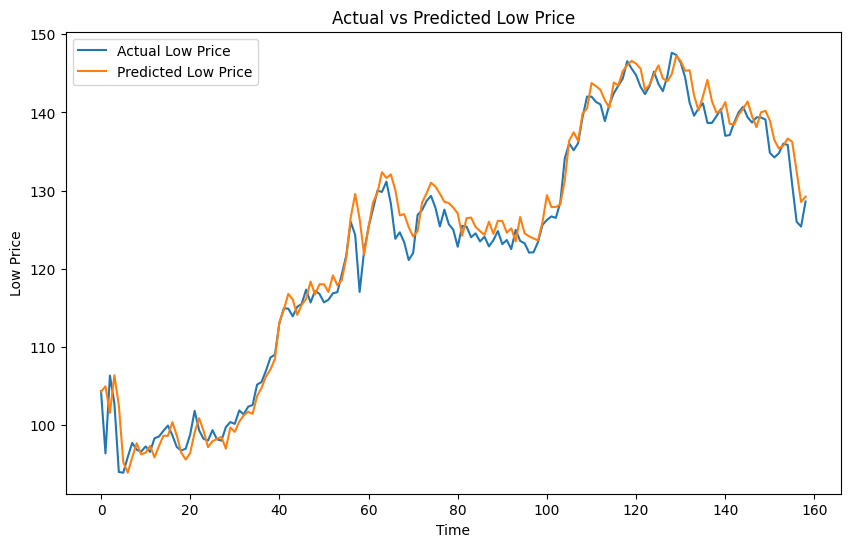

1/1 [==============================] - 0s 22ms/step
Predicted Close Price for the Next Day: 130.5414
Predicted High Price for the Next Day: 131.3911
Predicted Low Price for the Next Day: 129.2353


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Feature selection
features = ['Close', 'High', 'Low', 'score']  # Features to be used for prediction

# Prepare the data
X = df_merged[features].values
y = df_merged[['Close', 'High', 'Low']].values  # Target variables

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Define a function to create input and output sequences for LSTM
def create_sequences(X, y, time_steps=1):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i+time_steps])
        y_seq.append(y[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

# Define the number of time steps
time_steps = 1

# Create input and output sequences
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Split data into train and test sets
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, len(features))))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=3))  # 3 output nodes for Close, High, Low
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse scaling
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_test_pred_inv = scaler.inverse_transform(y_test_pred)
y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate RMSE (Root Mean Squared Error) and MSE (Mean Squared Error)
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
train_mse = mean_squared_error(y_train_inv, y_train_pred_inv)
test_mse = mean_squared_error(y_test_inv, y_test_pred_inv)
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Train MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')

# Calculate MAE (Mean Absolute Error)
train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)
print(f'Train MAE: {train_mae:.4f}')
print(f'Test MAE: {test_mae:.4f}')

# Plot actual vs predicted prices for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv[:, 0], label='Actual Close Price')
plt.plot(y_test_pred_inv[:, 0], label='Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test_inv[:, 1], label='Actual High Price')
plt.plot(y_test_pred_inv[:, 1], label='Predicted High Price')
plt.title('Actual vs Predicted High Price')
plt.xlabel('Time')
plt.ylabel('High Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test_inv[:, 2], label='Actual Low Price')
plt.plot(y_test_pred_inv[:, 2], label='Predicted Low Price')
plt.title('Actual vs Predicted Low Price')
plt.xlabel('Time')
plt.ylabel('Low Price')
plt.legend()
plt.show()

# Predict prices for the next day
last_sequence = X_seq[-1].reshape((1, time_steps, len(features)))
next_day_prices_scaled = model.predict(last_sequence)
next_day_prices = scaler.inverse_transform(next_day_prices_scaled)
print(f'Predicted Close Price for the Next Day: {next_day_prices[0][0]:.4f}')
print(f'Predicted High Price for the Next Day: {next_day_prices[0][1]:.4f}')
print(f'Predicted Low Price for the Next Day: {next_day_prices[0][2]:.4f}')
